In [1]:
## Load the libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [12]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=42)

In [13]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

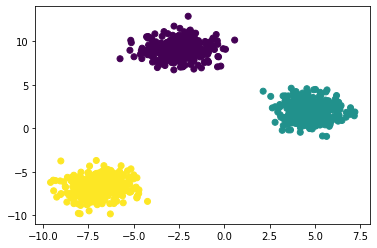

In [14]:
plt.scatter(X[:,0:1],X[:,1:],c=y)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.cluster import KMeans

In [24]:
## elbow method to find the how to select the k value
wcss=[]
for k in range(1,11):
    kmean=KMeans(n_clusters=k,init='k-means++')
    kmean.fit(X_train)
    wcss.append(kmean.inertia_)

Text(0.5, 1.0, 'K cluster with Wcss')

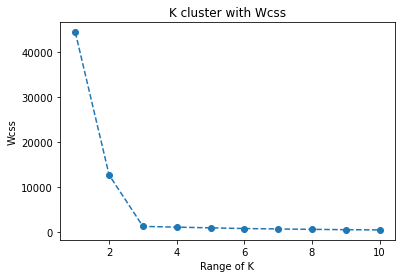

In [32]:
plt.plot(range(1,11),wcss,marker='o', linestyle='dashed')
plt.xlabel('Range of K')
plt.ylabel('Wcss')
plt.title('K cluster with Wcss')

In [34]:
kmean=KMeans(n_clusters=3,init='k-means++')
kmean.fit(X_train)

KMeans(n_clusters=3)

In [36]:
y_label=kmean.fit_predict(X_train)

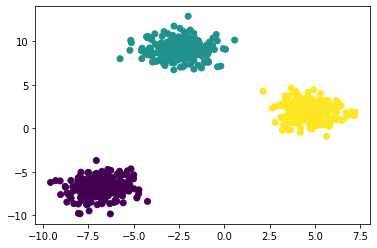

In [37]:
plt.scatter(X_train[:,0:1],X_train[:,1:],c=y_label)

In [38]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [44]:
from kneed import KneeLocator

In [47]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [48]:
k1.elbow

3

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
sillhouete_coeff=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,init='k-means++')
    kmean.fit(X_train)
    score=silhouette_score(X_train,kmean.labels_)
    sillhouete_coeff.append(score)

In [51]:
sillhouete_coeff

[0.7024009416893275,
 0.8417121581954964,
 0.6651559417541277,
 0.48720711543359485,
 0.33569644754219374,
 0.3393040015236932,
 0.3374845820212337,
 0.32655690260209885,
 0.3307835001534332]

Text(0.5, 1.0, 'K cluster with Wcss')

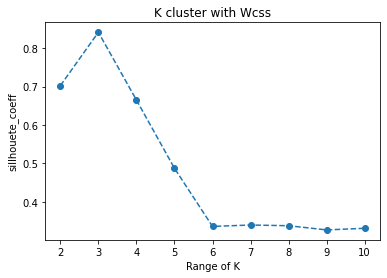

In [53]:
plt.plot(range(2,11),sillhouete_coeff,marker='o', linestyle='dashed')
plt.xlabel('Range of K')
plt.ylabel('sillhouete_coeff')
plt.title('K cluster with Wcss')